# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Import Open Weather Map Wrapper
import openweathermapy.core as owm

# Set up list and parameters
weather_json = []
params = {'units' : 'imperial', 'appid' : api_key}

# Create a loop to request all cities in list
for index, city in enumerate (cities):
    try:
        weather_json.append(owm.get_current(city, **params))
    except:
        print(f"{index} Records for {city} NOT Found")
    print(f"{index} Records for {city} WERE found")

0 Records for mitsamiouli WERE found
1 Records for hermanus WERE found
2 Records for port alfred WERE found
3 Records for valparaiso WERE found
4 Records for salalah WERE found
5 Records for yellowknife WERE found
6 Records for qaanaaq WERE found
7 Records for bethel WERE found
8 Records for kapaa WERE found
9 Records for jamestown WERE found
10 Records for cape town WERE found
11 Records for port-gentil WERE found
12 Records for adrar WERE found
13 Records for karratha WERE found
14 Records for opuwo WERE found
15 Records for neunkirchen WERE found
16 Records for sarai WERE found
17 Records for amahai WERE found
18 Records for chapais WERE found
19 Records for port hedland WERE found
20 Records for saint-augustin WERE found
21 Records for tambopata NOT Found
21 Records for tambopata WERE found
22 Records for tuatapere WERE found
23 Records for chabahar WERE found
24 Records for clyde river WERE found
25 Records for szczecinek WERE found
26 Records for punta alta WERE found
27 Records 

211 Records for port macquarie WERE found
212 Records for geraldton WERE found
213 Records for obo WERE found
214 Records for tuggurt NOT Found
214 Records for tuggurt WERE found
215 Records for warqla NOT Found
215 Records for warqla WERE found
216 Records for dikson WERE found
217 Records for bolungarvik NOT Found
217 Records for bolungarvik WERE found
218 Records for mullaitivu NOT Found
218 Records for mullaitivu WERE found
219 Records for verkhoyansk WERE found
220 Records for champerico WERE found
221 Records for felidhoo NOT Found
221 Records for felidhoo WERE found
222 Records for collierville WERE found
223 Records for east london WERE found
224 Records for georgetown WERE found
225 Records for qandala WERE found
226 Records for nizhniy kuranakh WERE found
227 Records for katsuura WERE found
228 Records for gosainganj WERE found
229 Records for srednekolymsk WERE found
230 Records for belushya guba NOT Found
230 Records for belushya guba WERE found
231 Records for ayan WERE fo

409 Records for haines junction WERE found
410 Records for bubaque WERE found
411 Records for port hardy WERE found
412 Records for muzhi WERE found
413 Records for ahuimanu WERE found
414 Records for buique WERE found
415 Records for formosa WERE found
416 Records for vila franca do campo WERE found
417 Records for leshukonskoye WERE found
418 Records for henties bay WERE found
419 Records for tambura NOT Found
419 Records for tambura WERE found
420 Records for karlskrona WERE found
421 Records for omboue WERE found
422 Records for grand gaube WERE found
423 Records for mayo WERE found
424 Records for nanortalik WERE found
425 Records for teguise WERE found
426 Records for xinqing WERE found
427 Records for cururupu WERE found
428 Records for high level WERE found
429 Records for hualmay WERE found
430 Records for simbahan WERE found
431 Records for suao NOT Found
431 Records for suao WERE found
432 Records for svetlogorsk WERE found
433 Records for nicoya WERE found
434 Records for v

621 Records for rybinsk WERE found
622 Records for bakchar WERE found
623 Records for moranbah WERE found
624 Records for sorland WERE found
625 Records for lata WERE found
626 Records for gravdal WERE found
627 Records for nautla WERE found
628 Records for aykhal WERE found
629 Records for katha NOT Found
629 Records for katha WERE found
630 Records for zhucheng WERE found
631 Records for sangar WERE found
632 Records for vanimo WERE found
633 Records for hami WERE found
634 Records for alta floresta WERE found
635 Records for taldan WERE found


In [9]:
# Check how many valid cities
len(weather_json)

572

In [10]:
# Set up variables to capture data
lat = []
name = []
temp = []
clouds = []
humidity = []
wind = []
country = []

# Loop through JSON to capture data
for i, v in enumerate (weather_json):
    lat.append(weather_json[i]['coord']['lat'])
    name.append(weather_json[i]['name'])
    temp.append(weather_json[i]['main']['temp'])
    clouds.append(weather_json[i]['clouds']['all'])
    humidity.append(weather_json[i]['main']['humidity'])
    wind.append(weather_json[i]['wind']['speed'])
    country.append(weather_json[i]['sys']['country'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a dictionary with all the info collected
weather_dict = {'city': name,
                'country' : country,
               'latitude' : lat,
               'Temperature': temp,
               'Cloudiness %' : clouds,
               'Humidity %': humidity,
               'Wind Speed': wind}

# Create DataFrame and export it to csv file
weather_df = pd.DataFrame(data = weather_dict)
weather_df.to_csv('Weather Data.csv')
weather_df.head()

,city,country,latitude,Temperature,Cloudiness %,Humidity %,Wind Speed
0,Mitsamiouli,KM,-11.38,77.90,0,78,19.48
1,Hermanus,ZA,-34.42,54.00,100,98,3.00
2,Port Alfred,ZA,-33.59,57.99,42,78,4.00
3,Valparaiso,US,41.47,88.99,40,52,5.82
4,Salalah,OM,17.01,82.40,75,88,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

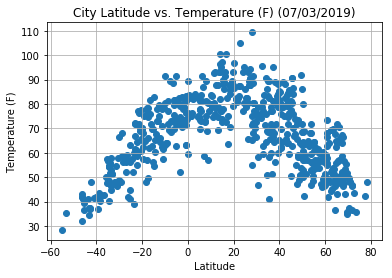

In [12]:
Temperature_Plot = plt.scatter(weather_df['latitude'], weather_df['Temperature'])

plt.grid()
plt.title('City Latitude vs. Temperature (F) (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Temperature_Plot.png')

#### Latitude vs. Humidity Plot

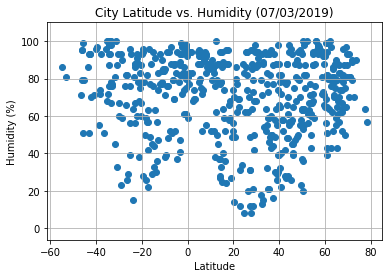

In [13]:
Humidity_Plot = plt.scatter(weather_df['latitude'], weather_df['Humidity %'])

plt.grid()
plt.title('City Latitude vs. Humidity (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(top=110)
plt.savefig('Humidity_Plot.png')

#### Latitude vs. Cloudiness Plot

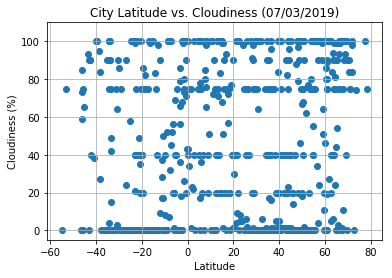

In [14]:
Cloudiness_Plot = plt.scatter(weather_df['latitude'], weather_df['Cloudiness %'])

plt.grid()
plt.title('City Latitude vs. Cloudiness (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(top=110)
plt.savefig('Cloudiness_Plot.png')

#### Latitude vs. Wind Speed Plot

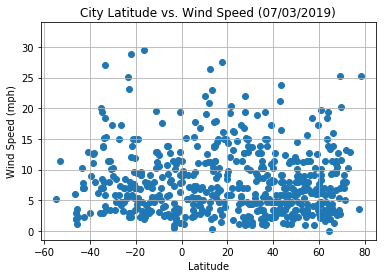

In [15]:
Wind_Plot = plt.scatter(weather_df['latitude'], weather_df['Wind Speed'])

plt.grid()
plt.title('City Latitude vs. Wind Speed (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(top=34)
plt.savefig('Wind_Plot.png')